# Linear Regression
Developed by Zion Knight (s3906411)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataFile = 'data/chartEventsPred.csv'

In [2]:
data = pd.read_csv(dataFile)
data.head()

,subject_id,label,charttime,glucose,next_glucose,mean_last3,std_last3,trend,BUN,Creatinine,Diastolic Blood Pressure,Heart Rate,Hemoglobin,Mean Blood Pressure,O2 Saturation,PTT,Respiratory Rate,Sodium,Systolic Blood Pressure,WBC
0,10001217,normal,2157-12-19 22:00:00,145.0,113.0,129.000000,22.627417,32.0,9.500000,0.450000,77.720000,86.711538,11.750000,88.673469,95.019231,32.700000,19.038462,138.5,126.900000,13.70
1,10001725,normal,2110-04-11 18:02:00,146.0,152.0,153.500000,10.606602,-15.0,17.000000,0.800000,61.187500,79.156250,13.250000,70.062500,98.225806,30.600000,17.531250,139.0,100.406250,18.55
2,10001884,normal,2131-01-11 06:37:00,140.0,145.0,144.000000,5.656854,-8.0,26.785714,0.885714,74.669683,70.800000,8.670588,90.529412,97.589286,58.061765,19.044444,136.5,129.176471,12.78
3,10001884,hyper,2131-01-12 03:34:00,145.0,199.0,144.333333,4.041452,5.0,26.785714,0.885714,74.669683,70.800000,8.670588,90.529412,97.589286,58.061765,19.044444,136.5,129.176471,12.78
4,10001884,normal,2131-01-13 04:29:00,199.0,177.0,161.333333,32.715949,54.0,26.785714,0.885714,74.669683,70.800000,8.670588,90.529412,97.589286,58.061765,19.044444,136.5,129.176471,12.78


In [3]:
data.describe()

,subject_id,glucose,next_glucose,mean_last3,std_last3,trend,BUN,Creatinine,Diastolic Blood Pressure,Heart Rate,Hemoglobin,Mean Blood Pressure,O2 Saturation,PTT,Respiratory Rate,Sodium,Systolic Blood Pressure,WBC
count,9.146550e+05,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000
mean,1.500703e+07,144.578997,144.231296,145.013717,21.774393,-0.404588,24.206049,1.065083,62.462120,85.100259,9.872240,78.801288,96.933580,35.347523,19.601873,138.946948,118.954190,13.588411
std,2.885950e+06,55.057266,54.736537,49.459708,22.017058,41.085449,12.172764,0.471067,8.814706,11.384413,1.491851,8.379668,1.329479,9.306082,2.909948,3.450008,12.542660,5.240596
min,1.000122e+07,20.000000,20.000000,21.666667,0.000000,-880.000000,1.000000,0.076190,36.975427,46.827586,5.500000,53.450000,92.428571,17.300000,10.452830,129.357143,80.133333,0.100000
25%,1.247520e+07,110.000000,110.000000,113.583333,8.962886,-17.000000,14.730769,0.714286,56.285714,77.038462,8.758065,72.727273,96.071147,28.270833,17.484663,136.666667,109.878947,9.872973
50%,1.502908e+07,132.000000,132.000000,133.333333,16.010413,-1.000000,21.200000,0.950000,61.846885,84.570455,9.606667,77.774026,97.031707,32.240000,19.441026,138.800000,117.727273,12.727273
75%,1.752136e+07,164.000000,164.000000,162.666667,27.392213,16.000000,31.666667,1.325000,67.988372,92.696703,10.725000,84.094118,97.889344,41.023611,21.536960,141.230769,127.176724,16.366667
max,1.999983e+07,1000.000000,1000.000000,885.333333,584.777308,907.000000,58.000000,2.450000,91.115942,120.666667,15.800000,106.000000,100.414493,59.016667,27.716981,148.000000,158.623188,29.325000


In [4]:
data.isnull().sum()

subject_id                  0
label                       0
charttime                   0
glucose                     0
next_glucose                0
mean_last3                  0
std_last3                   0
trend                       0
BUN                         0
Creatinine                  0
Diastolic Blood Pressure    0
Heart Rate                  0
Hemoglobin                  0
Mean Blood Pressure         0
O2 Saturation               0
PTT                         0
Respiratory Rate            0
Sodium                      0
Systolic Blood Pressure     0
WBC                         0
dtype: int64

In [5]:
data = data.dropna()
data.isnull().sum()
data.drop(['subject_id', 'charttime', 'label'], axis=1, inplace=True)

In [6]:
data.describe()

,glucose,next_glucose,mean_last3,std_last3,trend,BUN,Creatinine,Diastolic Blood Pressure,Heart Rate,Hemoglobin,Mean Blood Pressure,O2 Saturation,PTT,Respiratory Rate,Sodium,Systolic Blood Pressure,WBC
count,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000,914655.000000
mean,144.578997,144.231296,145.013717,21.774393,-0.404588,24.206049,1.065083,62.462120,85.100259,9.872240,78.801288,96.933580,35.347523,19.601873,138.946948,118.954190,13.588411
std,55.057266,54.736537,49.459708,22.017058,41.085449,12.172764,0.471067,8.814706,11.384413,1.491851,8.379668,1.329479,9.306082,2.909948,3.450008,12.542660,5.240596
min,20.000000,20.000000,21.666667,0.000000,-880.000000,1.000000,0.076190,36.975427,46.827586,5.500000,53.450000,92.428571,17.300000,10.452830,129.357143,80.133333,0.100000
25%,110.000000,110.000000,113.583333,8.962886,-17.000000,14.730769,0.714286,56.285714,77.038462,8.758065,72.727273,96.071147,28.270833,17.484663,136.666667,109.878947,9.872973
50%,132.000000,132.000000,133.333333,16.010413,-1.000000,21.200000,0.950000,61.846885,84.570455,9.606667,77.774026,97.031707,32.240000,19.441026,138.800000,117.727273,12.727273
75%,164.000000,164.000000,162.666667,27.392213,16.000000,31.666667,1.325000,67.988372,92.696703,10.725000,84.094118,97.889344,41.023611,21.536960,141.230769,127.176724,16.366667
max,1000.000000,1000.000000,885.333333,584.777308,907.000000,58.000000,2.450000,91.115942,120.666667,15.800000,106.000000,100.414493,59.016667,27.716981,148.000000,158.623188,29.325000


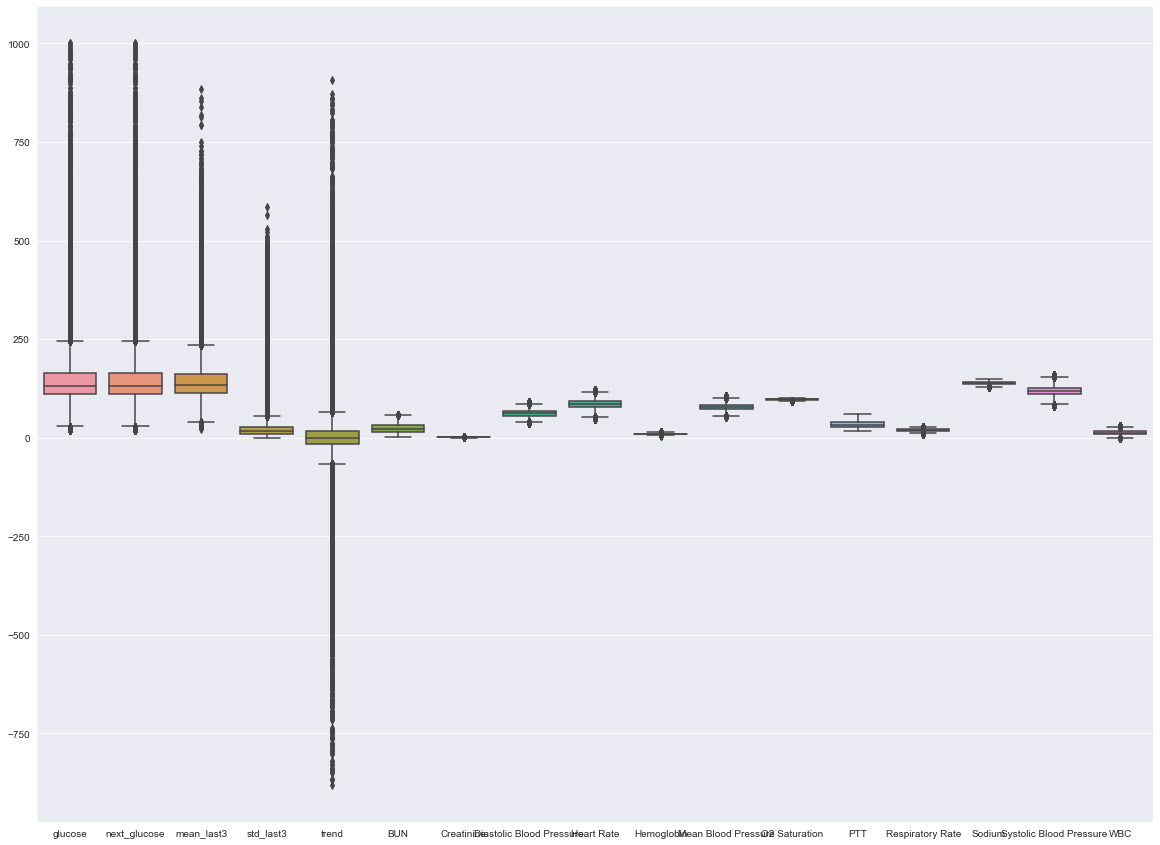

In [7]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=data)
plt.show()

In [8]:
y = data['next_glucose']
x = data.drop(['next_glucose'], axis=1)

In [9]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

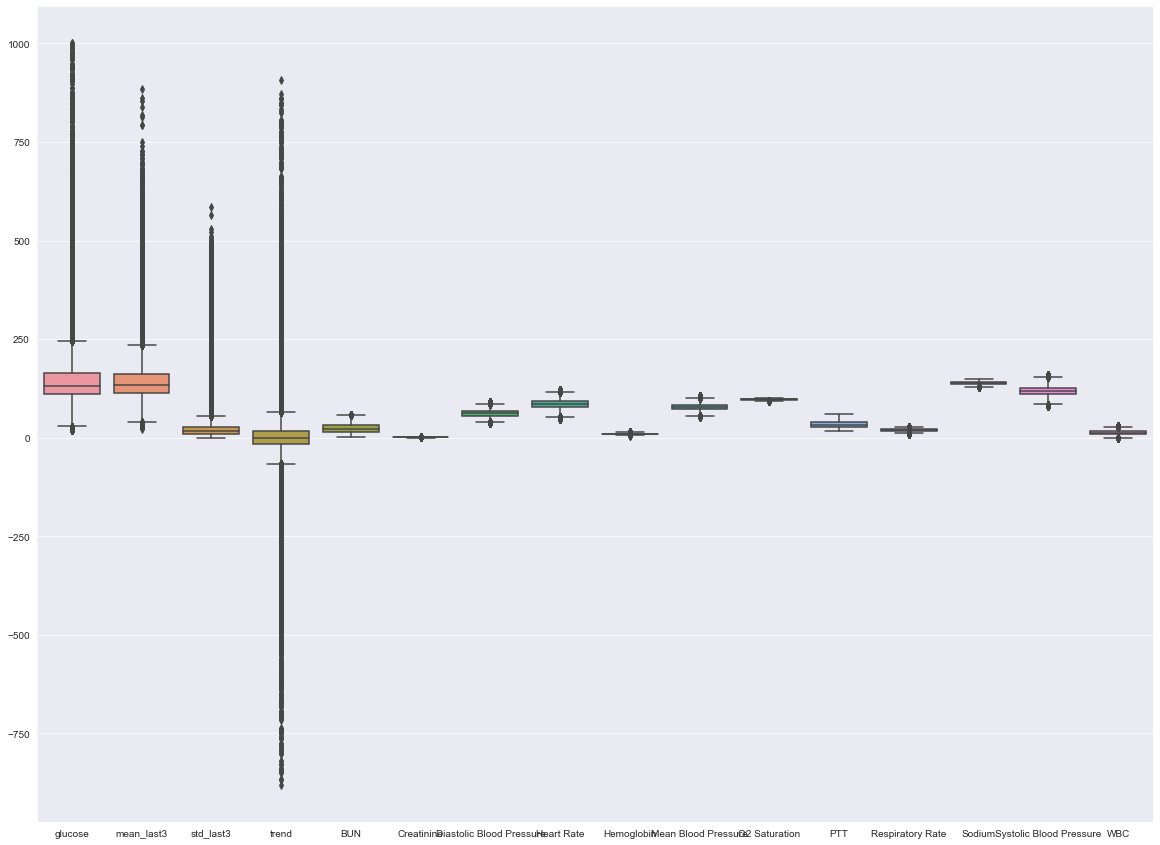

In [10]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=x)
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(x_test)

MSE = np.mean((y_test - y_pred)**2)
RMSE = np.sqrt(MSE)

print("MSE:", MSE)
print("RMSE:", RMSE)

MSE: 1390.8746894297958
RMSE: 37.29443241865729


In [14]:
print("r2", model.score(x_test, y_test))

r2 0.5382059110786765


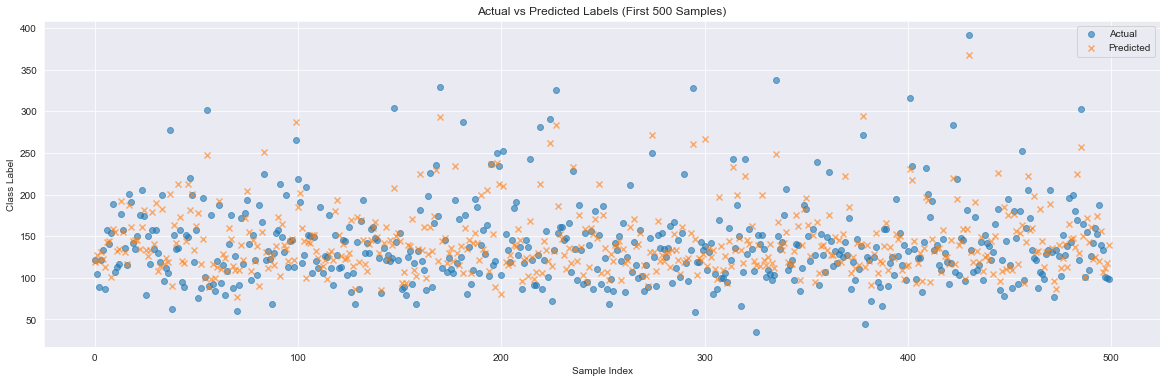

In [13]:
import matplotlib.pyplot as plt

N = 500  # Show only a subset for clarity

plt.figure(figsize=(20, 6))
plt.scatter(range(N), y_test[:N], label='Actual', marker='o', alpha=0.6)
plt.scatter(range(N), y_pred[:N], label='Predicted', marker='x', alpha=0.6)
plt.legend()
plt.title('Actual vs Predicted Labels (First {} Samples)'.format(N))
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.grid(True)
plt.show()
